In [1]:
%matplotlib inline

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

# from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

# Tree and Ensemble Methods Notes

## Misc notes

Scimago scopus - Journal rankings

Confounding variable

MLFlow  
TensorBoard (for deep learning)

IoU - intersection over union (e.g - computer vision)

IID - Independent and identically distributed random variables

Feature selection in Sklearn - https://scikit-learn.org/1.5/modules/feature_selection.html

Overparameterized model

Choosing the right estimator - https://scikit-learn.org/1.5/machine_learning_map.html

^ DIAGRAM TO BE TAKEN WITH A GRAIN OF SALT

Feature importances - https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative below.

https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance

**Sklearn.ensemble**

BaggingClassifier & BaggingRegressor

BaggingClassifier & RandomForest difference - RF uses not only random data samples but also random features (columns)

VotingClassifier and VotingRegressor

StackingClassifier and StackingRegressor

Adaptive Boosting (AdaBoost) and Gradient Boosting (HistGradientBoosting for large datasets)

**XGBoost**

https://xgboost.readthedocs.io/en/stable/parameter.html - check Learning Task Parameters for different available loss functions (custom ones also supported)

Huber Loss - Robust regression/classification (less sensitive to outliers)

Monotonic_cst - Monotonic Constraints - https://scikit-learn.org/stable/auto_examples/ensemble/plot_monotonic_constraints.html

LightGBM - https://lightgbm.readthedocs.io/en/stable/ - Very quick, runs well on GPUs (good parallelisation)

## Demo

In [4]:
data = load_iris()

In [13]:
data2 = load_digits()

In [5]:
attributes, targets = data["data"], data["target"]

In [14]:
attributes2, targets2 = data2["data"], data2["target"]

In [11]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
tree = DecisionTreeClassifier()

In [7]:
tree.fit(attributes, targets)

DecisionTreeClassifier()

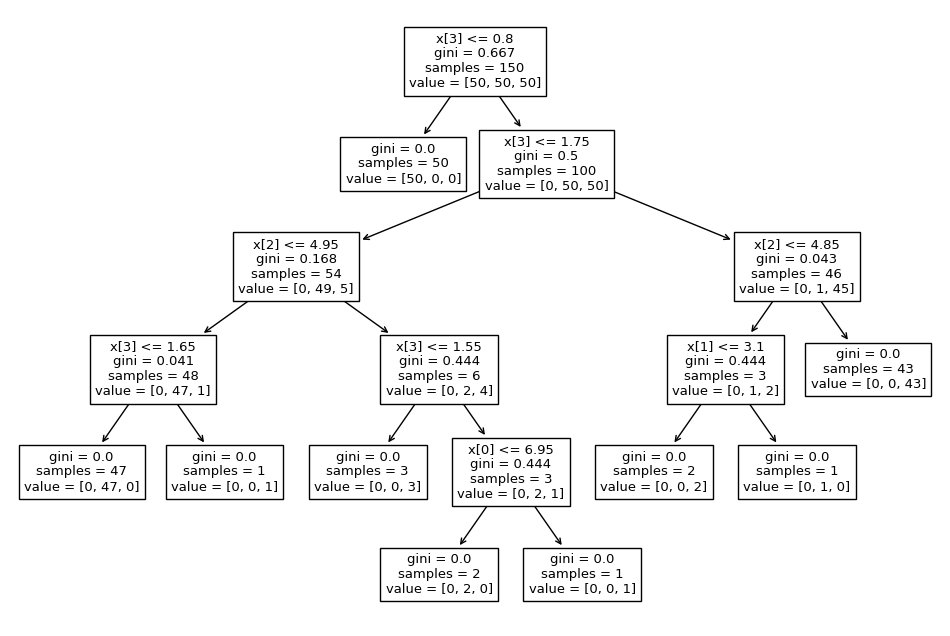

In [10]:
plt.figure(figsize = (12, 8))
plot_tree(tree)
plt.show()

In [16]:
tree2 = DecisionTreeClassifier()

In [17]:
tree2.fit(attributes2, targets2)

DecisionTreeClassifier()

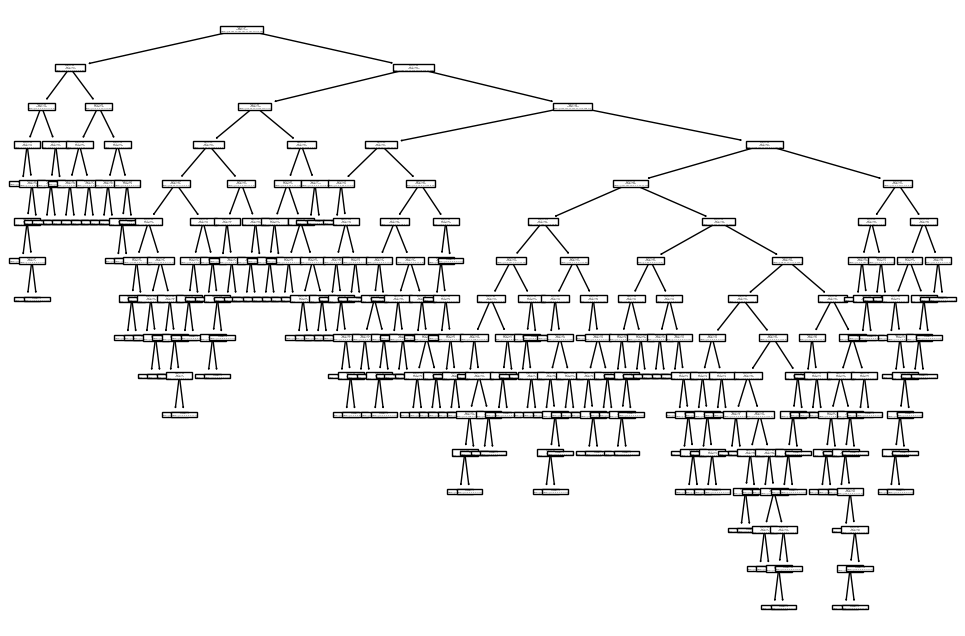

In [18]:
plt.figure(figsize = (12, 8))
plot_tree(tree2)
plt.show()

In [21]:
print(export_text(tree2))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_61 <= 0.50
|   |   |   |   |--- class: 5
|   |   |   |--- feature_61 >  0.50
|   |   |   |   |--- feature_37 <= 5.50
|   |   |   |   |   |--- feature_58 <= 3.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_58 >  3.50
|   |   |   |   |   |   |--- feature_26 <= 9.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_26 >  9.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_37 >  5.50
|   |   |   |   |   |--- class: 4
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_62 <= 7.50
|   |   |   |   |--- feature_44 <= 12.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_44 >  12.50
|   |   |   |   |   |--- class: 4
|   |   |   |--- feature_62 >  7.50
|   |   |   |   |--- class: 2
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_42 <= 3.50
|   |   |   | 

In [24]:
tree2.tree_.max_depth

15

In [31]:
forest = RandomForestClassifier(n_estimators = 7)

In [32]:
forest.fit(attributes2, targets2)

RandomForestClassifier(n_estimators=7)

In [33]:
forest.estimator_

DecisionTreeClassifier()

In [34]:
for estimator in forest.estimators_:
    print(estimator.tree_.max_depth)

13
14
12
14
13
12
12


In [35]:
forest.feature_importances_

array([0.        , 0.00057896, 0.03191972, 0.01209498, 0.00472809,
       0.02981179, 0.00648467, 0.0004674 , 0.        , 0.0037592 ,
       0.01545228, 0.00428393, 0.0125621 , 0.03196448, 0.00707844,
       0.00198174, 0.        , 0.00784598, 0.01867989, 0.01497511,
       0.03363279, 0.04220133, 0.00679409, 0.        , 0.        ,
       0.01835443, 0.03234966, 0.02957858, 0.02250104, 0.03090441,
       0.03156729, 0.00017411, 0.        , 0.02690123, 0.03087633,
       0.02210042, 0.03090839, 0.01387876, 0.02609399, 0.        ,
       0.        , 0.02030332, 0.05560169, 0.04422262, 0.03588106,
       0.01760979, 0.01676418, 0.        , 0.        , 0.00219801,
       0.02198058, 0.01818503, 0.01159   , 0.03683024, 0.0206408 ,
       0.00077539, 0.        , 0.00282705, 0.01343788, 0.01345525,
       0.01866569, 0.01994664, 0.02380918, 0.00178996])

In [37]:
permutation_importance(forest, attributes2, targets2)["importances_mean"]

array([ 0.        ,  0.        ,  0.00734558,  0.00100167, -0.00033389,
        0.00589872,  0.00100167,  0.        ,  0.        ,  0.0001113 ,
        0.00111297,  0.00044519,  0.00077908,  0.00456316,  0.00111297,
        0.        ,  0.        ,  0.00155815,  0.00122426,  0.00077908,
        0.01402337,  0.02070117,  0.00044519,  0.        ,  0.        ,
        0.00389538,  0.0164719 ,  0.01079577,  0.00255982,  0.00189204,
        0.01391208,  0.        ,  0.        ,  0.00255982,  0.00434057,
        0.00356149,  0.00211464,  0.00111297,  0.01368948,  0.        ,
        0.        ,  0.00044519,  0.04997218,  0.0198108 ,  0.00767947,
        0.00244853,  0.00033389,  0.        ,  0.        ,  0.00033389,
        0.00222593,  0.0033389 , -0.00033389,  0.00912632,  0.00367279,
        0.        ,  0.        ,  0.        ,  0.00033389,  0.0001113 ,
        0.0031163 ,  0.00300501,  0.00111297,  0.        ])

In [39]:
list(zip(data2["feature_names"], np.round(permutation_importance(forest, attributes2, targets2)["importances_mean"], 3)))

[('pixel_0_0', 0.0),
 ('pixel_0_1', -0.0),
 ('pixel_0_2', 0.008),
 ('pixel_0_3', 0.001),
 ('pixel_0_4', -0.001),
 ('pixel_0_5', 0.007),
 ('pixel_0_6', 0.001),
 ('pixel_0_7', 0.0),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.0),
 ('pixel_1_2', 0.001),
 ('pixel_1_3', 0.0),
 ('pixel_1_4', 0.001),
 ('pixel_1_5', 0.005),
 ('pixel_1_6', 0.002),
 ('pixel_1_7', 0.0),
 ('pixel_2_0', 0.0),
 ('pixel_2_1', 0.001),
 ('pixel_2_2', 0.002),
 ('pixel_2_3', 0.001),
 ('pixel_2_4', 0.013),
 ('pixel_2_5', 0.02),
 ('pixel_2_6', 0.0),
 ('pixel_2_7', 0.0),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.004),
 ('pixel_3_2', 0.016),
 ('pixel_3_3', 0.011),
 ('pixel_3_4', 0.003),
 ('pixel_3_5', 0.001),
 ('pixel_3_6', 0.014),
 ('pixel_3_7', 0.0),
 ('pixel_4_0', 0.0),
 ('pixel_4_1', 0.003),
 ('pixel_4_2', 0.005),
 ('pixel_4_3', 0.003),
 ('pixel_4_4', 0.003),
 ('pixel_4_5', 0.001),
 ('pixel_4_6', 0.016),
 ('pixel_4_7', 0.0),
 ('pixel_5_0', 0.0),
 ('pixel_5_1', 0.0),
 ('pixel_5_2', 0.045),
 ('pixel_5_3', 0.02),
 ('pixel_5_4', 0.01)

In [40]:
pd.DataFrame(list(zip(data2["feature_names"], np.round(permutation_importance(forest, attributes2, targets2)["importances_mean"], 3)))).sort_values(1, ascending = False)

,0,1
42,pixel_5_2,0.048
21,pixel_2_5,0.020
43,pixel_5_3,0.017
26,pixel_3_2,0.016
30,pixel_3_6,0.016
...,...,...
24,pixel_3_0,0.000
31,pixel_3_7,0.000
1,pixel_0_1,0.000
37,pixel_4_5,0.000
